In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
Unemp = pd.read_csv("Unemployment in India.csv")

In [4]:
Unemp.head(10)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
5,Andhra Pradesh,31-10-2019,Monthly,3.52,12017412.0,43.01,Rural
6,Andhra Pradesh,30-11-2019,Monthly,4.12,11397681.0,41.00,Rural
7,Andhra Pradesh,31-12-2019,Monthly,4.38,12528395.0,45.14,Rural
8,Andhra Pradesh,31-01-2020,Monthly,4.84,12016676.0,43.46,Rural
9,Andhra Pradesh,29-02-2020,Monthly,5.91,11723617.0,42.83,Rural


In [5]:
Unemp.isnull().sum()

Region                                     14
Date                                       14
Frequency                                  14
Estimated Unemployment Rate (%)            14
Estimated Employed                         14
Estimated Labour Participation Rate (%)    14
Area                                       14
dtype: int64

In [8]:
un = Unemp.dropna()

In [11]:
un.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 46.2+ KB


In [10]:
un['Date'] = pd.to_datetime(un['Date'], format='%d-%m-%Y')

C:\Users\rutik\AppData\Local\Temp\ipykernel_24332\2967572198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  un['Date'] = pd.to_datetime(un['Date'], format='%d-%m-%Y')


In [12]:
un.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 46.2+ KB


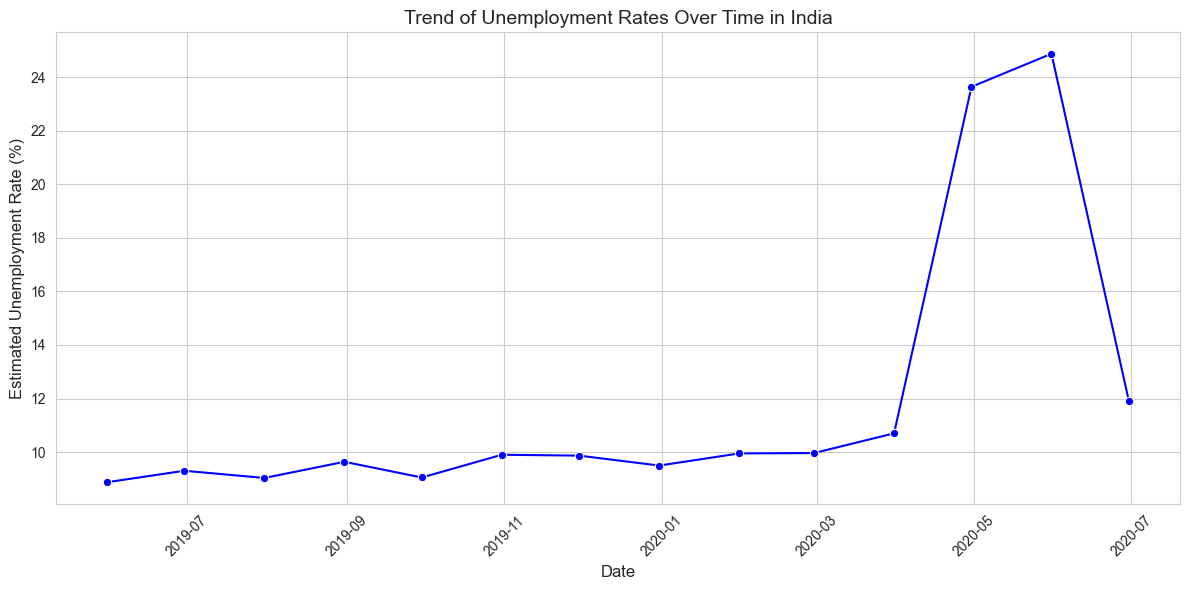

In [25]:
unemployment_trend = un.groupby('Date')['Estimated Unemployment Rate (%)'].mean().reset_index()
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.lineplot(data=unemployment_trend, x='Date', y='Estimated Unemployment Rate (%)', marker='o', color='b')
plt.title('Trend of Unemployment Rates Over Time in India', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Estimated Unemployment Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\rutik\AppData\Local\Temp\ipykernel_24332\3842003082.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=regional_unemployment, x='Estimated Unemployment Rate (%)', y='Region', palette='viridis')


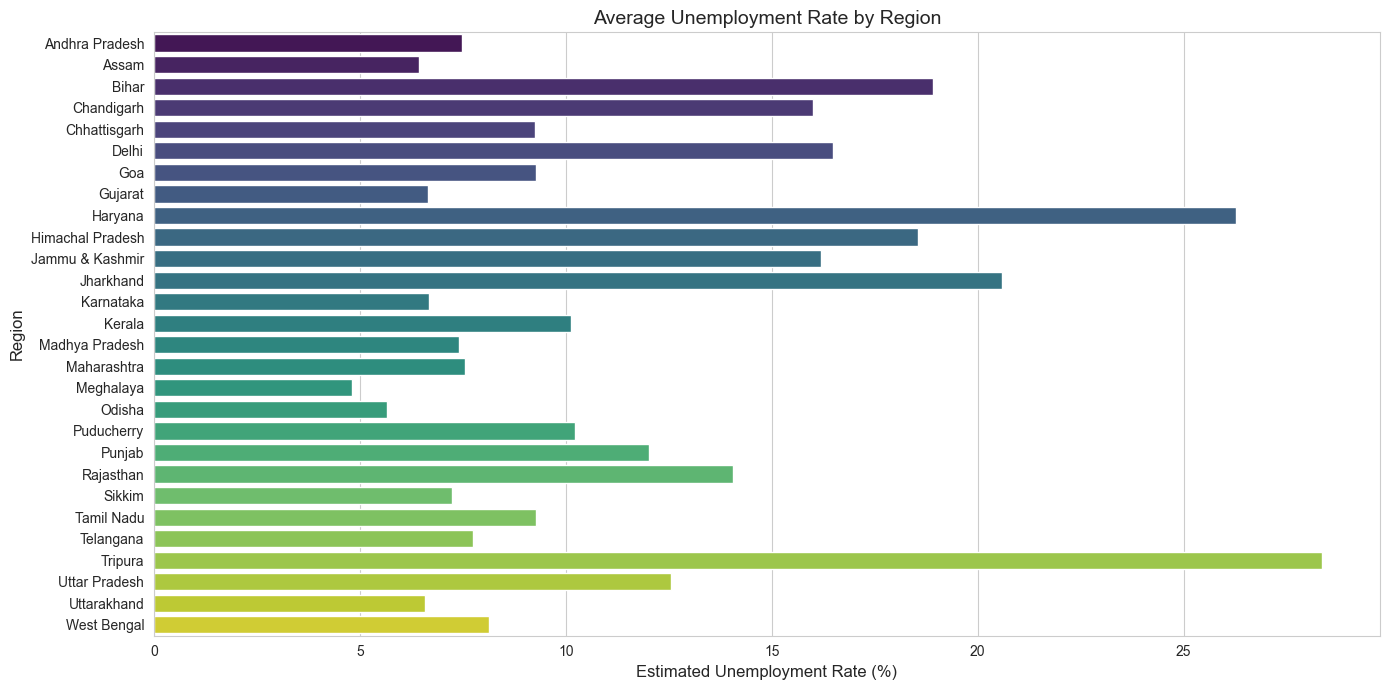

In [16]:

regional_unemployment = un.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index()


plt.figure(figsize=(14, 7))
sns.barplot(data=regional_unemployment, x='Estimated Unemployment Rate (%)', y='Region', palette='viridis')
plt.title('Average Unemployment Rate by Region', fontsize=14)
plt.xlabel('Estimated Unemployment Rate (%)', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\rutik\AppData\Local\Temp\ipykernel_24332\1486615465.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=area_unemployment, x='Area', y='Estimated Unemployment Rate (%)', palette='coolwarm')


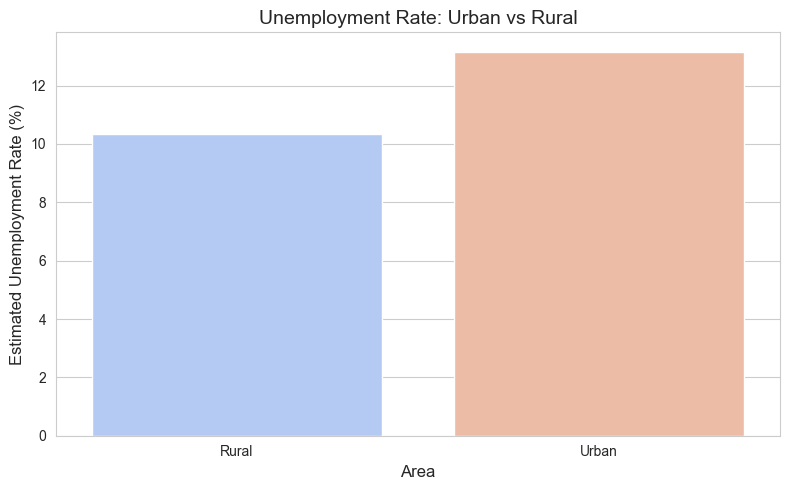

In [18]:

area_unemployment = un.groupby('Area')['Estimated Unemployment Rate (%)'].mean().reset_index()


plt.figure(figsize=(8, 5))
sns.barplot(data=area_unemployment, x='Area', y='Estimated Unemployment Rate (%)', palette='coolwarm')
plt.title('Unemployment Rate: Urban vs Rural', fontsize=14)
plt.xlabel('Area', fontsize=12)
plt.ylabel('Estimated Unemployment Rate (%)', fontsize=12)
plt.tight_layout()
plt.show()


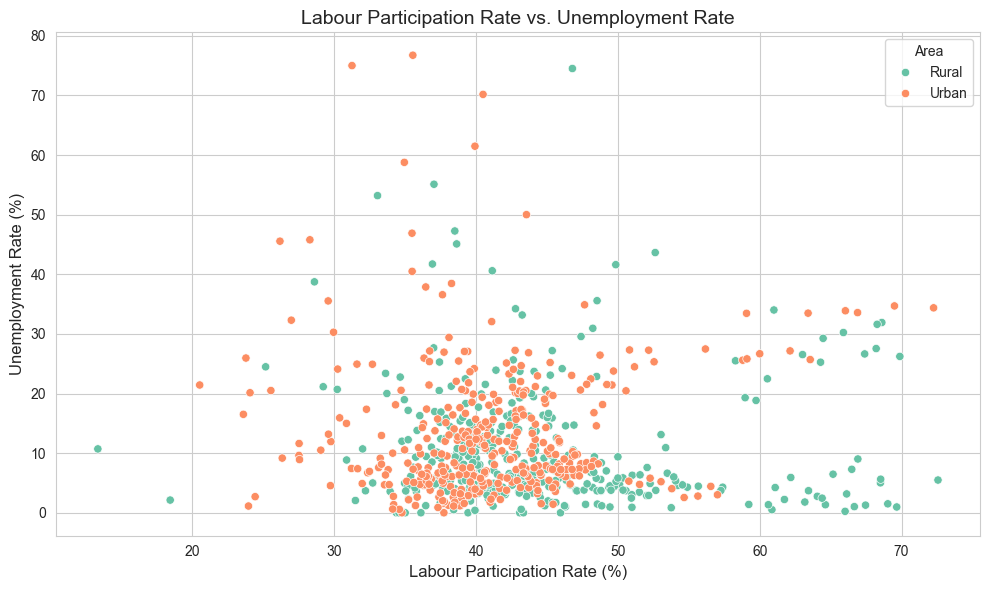

In [20]:

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=un, 
    x='Estimated Labour Participation Rate (%)', 
    y='Estimated Unemployment Rate (%)', 
    hue='Area', 
    palette='Set2'
)
plt.title('Labour Participation Rate vs. Unemployment Rate', fontsize=14)
plt.xlabel('Labour Participation Rate (%)', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.legend(title='Area')
plt.tight_layout()
plt.show()


C:\Users\rutik\AppData\Local\Temp\ipykernel_24332\3111527655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  un['Month'] = un['Date'].dt.month


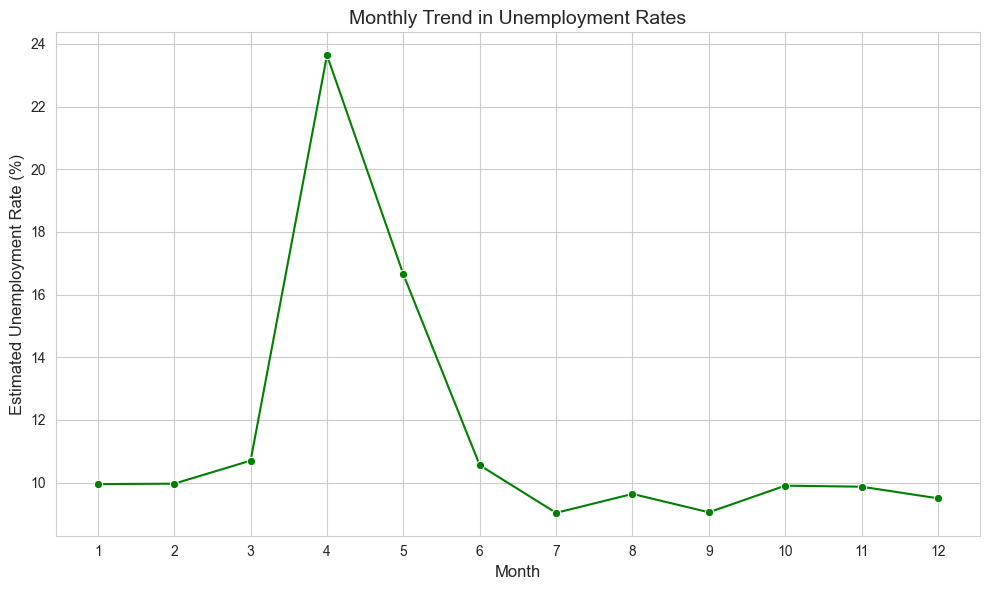

In [24]:

un['Month'] = un['Date'].dt.month


monthly_trend =un.groupby('Month')['Estimated Unemployment Rate (%)'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_trend, x='Month', y='Estimated Unemployment Rate (%)', marker='o', color='g')
plt.title('Monthly Trend in Unemployment Rates', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Estimated Unemployment Rate (%)', fontsize=12)
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()
